In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Station columns
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(f"{c['name']:<20} {c['type']}")


id                   INTEGER
station              TEXT
name                 TEXT
latitude             FLOAT
longitude            FLOAT
elevation            FLOAT


In [16]:
# Measurement columns
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(f"{c['name']:<20} {c['type']}")


id                   INTEGER
station              TEXT
date                 TEXT
prcp                 FLOAT
tobs                 FLOAT


In [30]:
# Find the most recent date in the data set.
(latest_date,) = session.query(Measurement.date)\
.order_by(Measurement.date.desc()).first()
latest_date

'2017-08-23'

In [39]:
latest_dt = latest_date.split ("-")
latest_dt[0] = int(latest_dt[0])
latest_dt[1] = int(latest_dt[1])
latest_dt[2] = int(latest_dt[2])
latest_dt = dt.date(latest_dt[0], latest_dt[1], latest_dt[2])
latest_dt


datetime.date(2017, 8, 23)

In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
year_ago = latest_dt - dt.timedelta(days=365)
year_ago

# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores

precipitation_sr = session.query(Measurement.station, Measurement.date\
                                 , Measurement.prcp).filter(Measurement.date>=year_ago).all()
precipitation_sr


# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(precipitation_sr, columns = ['Station','Date', 'Prcp'])
prec_df

# Sort the dataframe by date
sorted_df = prec_df.sort_values('Date')
sorted_df





Station        Date  Prcp
0     USC00519397  2016-08-23  0.00
1009  USC00517948  2016-08-23   NaN
1529  USC00519281  2016-08-23  1.79
704   USC00514830  2016-08-23  0.05
361   USC00513117  2016-08-23  0.15
...           ...         ...   ...
1527  USC00519523  2017-08-22  0.00
1008  USC00514830  2017-08-23  0.00
360   USC00519397  2017-08-23  0.00
1528  USC00519523  2017-08-23  0.08
2229  USC00516128  2017-08-23  0.45

[2230 rows x 3 columns]

Text(0.5, 1.0, 'Prec')

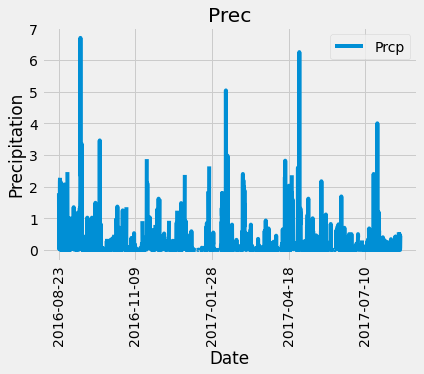

In [82]:
# Use Pandas Plotting with Matplotlib to plot the data

    
sorted_df.plot (x="Date", y="Prcp", rot =90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Prec")

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

Prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

# Exploratory Station Analysis

In [89]:
# Design a query to calculate the total number stations in the dataset
#precipitation_sr = session.query(Measurement.station, Measurement.date\
                               #  , Measurement.prcp).filter(Measurement.date>=year_ago).all()
    
#select *from station

station_count = session.query(Measurement.station.distinct()).count()
station_count


9

In [105]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#select station, count(station) from station
#group_by = station

active_stations = session.query(Measurement.station, func.count(Measurement.station))\
        .group_by(Measurement.station)\
        .order_by( func.count(Measurement.station).desc() )\
        .all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [130]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station_row = active_stations[0]
most_active_station = most_active_station_row[0]
most_active_station 


'USC00519281'

In [127]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_ago = latest_dt - dt.timedelta(days=365)
temperature_months = session.query(Measurement.tobs)\
    .filter(Measurement.station==most_active_station).filter(Measurement.date>=year_ago).all()
temperature_months

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


<AxesSubplot:ylabel='Frequency'>

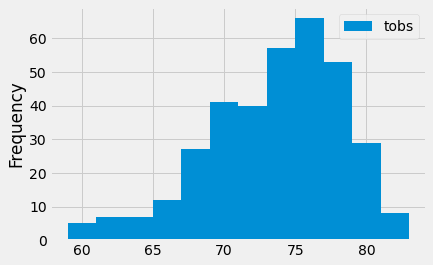

In [131]:
DF=pd.DataFrame(temperature_months, columns=["tobs"])
DF.plot.hist (bins=12)


# Close session

In [ ]:
# Close Session
session.close()